In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


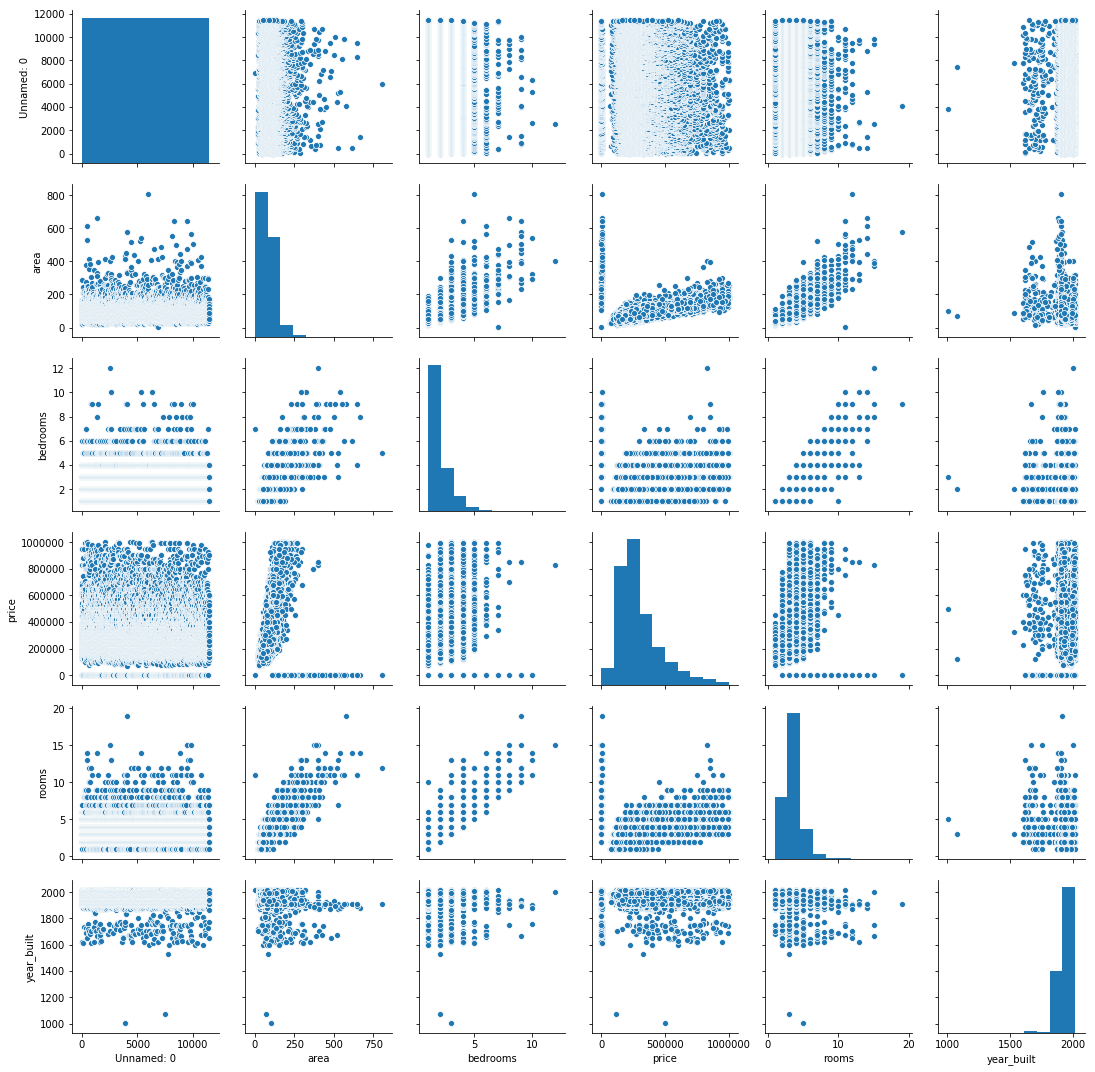

In [56]:
# checking the matrix scatterplot for fun.
sns.pairplot(df)
plt.show()

In [47]:
# creating a subset of the data for the area, amount of rooms and the price.
df_subset = df[['area', 'price','rooms']]
df_subset.head()

,area,price,rooms
0,108,510000,3
1,47,215000,2
2,116,325000,3
3,58,315000,3
4,63,200000,3


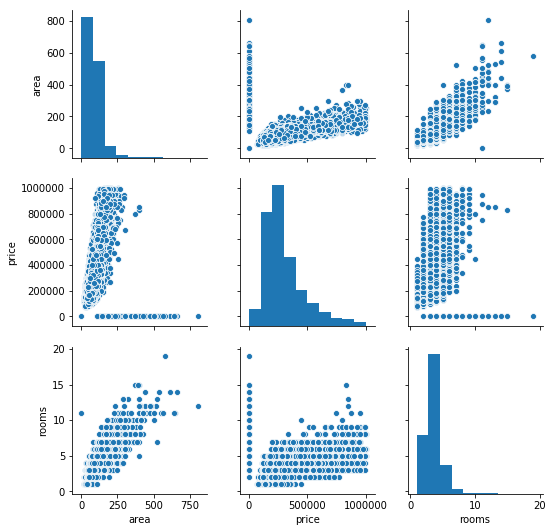

In [55]:
# plotting a matrix scatterplot for the subset
sns.pairplot(df_subset)

In [44]:
# making sure there's no 'wrong' data included, like a price below 30.000,-
# and rooms/area can't be below 1 (no rooms, no area)
df_subset2 = df_subset2[df_subset2['price'] > 30000]
df_subset2 = df_subset2[df_subset2['rooms'] >= 1]
df_subset2 = df_subset2[df_subset2['area'] >= 1]
df_subset2.head()

,area,price,rooms
0,108,510000,3
1,47,215000,2
2,116,325000,3
3,58,315000,3
4,63,200000,3


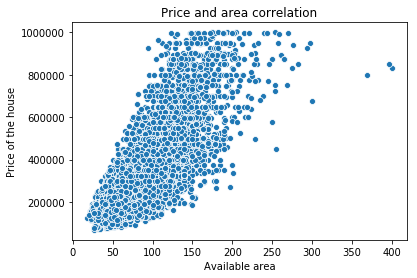

In [50]:
# plotting the area and price in a scatterplot, naming the x and y axis and the plot itself
sns.scatterplot(x="area", y="price", data=df_subset2)
plt.xlabel('Available area')
plt.ylabel('Price of the house')
plt.title('Price and area correlation')
plt.show()

The relation is somewhat linear. The points lie around a virtual line. <br> 
However, the variation seems to increase with higher pricing and more available area.

In [52]:
# importing the pearsonr
from scipy.stats.stats import pearsonr
pearsonr(df_subset2['area'],df_subset2['price'])

(0.7250807666953685, 0.0)

Area and price are strongly correlated (r = 0.73) <br>
The correlation is highly significant (p < 0.001)

My conclusion is that there are probably properties in Amsterdam that have a very high price based on its location. When a little further out of Amsterdam, there is more space available. This means that for the same (or similar) price, you can have a 'Grachtenpand' or a large farm-like home in the outskirts of the city. <br>
Besides that, the lower the price, the less available area you have in your property. 